# Primeira Parte

In [ ]:
import pandas as pd

In [ ]:
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
 

In [ ]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340


In [ ]:
last_date = "2/4/22"

confirmed[last_date]

0       165358
1       263172
2       256806
3        36599
4        98340
        ...   
275    2315689
276     556550
277      11145
278     306777
279     230170
Name: 2/4/22, Length: 280, dtype: int64

In [ ]:
confirmed['Country/Region']

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
275               Vietnam
276    West Bank and Gaza
277                 Yemen
278                Zambia
279              Zimbabwe
Name: Country/Region, Length: 280, dtype: object

In [ ]:
confirmed.shape

(280, 749)

In [ ]:
confirmed['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 196, dtype: int64

In [ ]:
confirmed.sample(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22
132,NaN,Gambia,13.443200,-15.310100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10136,10136,10136,10136,10170,10170,10170,10170,10376,10376,10792,10792,10792,10792,10792,11122,11122,11122,11122,11122,11122,11572,11572,11572,11572,11572,11572,11572,11572,11572,11572,11572,11572,11842,11842,11842,11863,11863,11863,11880
58,Anhui,China,31.825700,117.226400,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009
118,NaN,Finland,61.924110,25.748151,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,4,...,242588,249246,256119,263504,270829,277700,281702,286679,296204,306188,315915,323246,332270,338070,344711,355258,364470,373398,381673,389770,395472,401722,411849,421013,429525,437573,444869,449237,453833,461001,464394,470665,475431,475431,475431,489870,493114,501152,507940,514892
41,Diamond Princess,Canada,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,NaN,Kosovo,42.602636,20.902977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,161343,161356,161389,161442,161484,161531,161560,161598,161706,161813,161965,162109,162373,162677,162913,163269,163693,164120,164705,165363,166134,166862,167582,169632,172340,175283,178489,181446,183689,186396,190793,194710,198327,201955,204345,205938,207971,210561,212671,214524
99,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,964857,965002,965243,965571,966004,966473,966942,967498,968171,969138,970567,972513,974687,977410,979929,982614,985402,988789,992125,995631,999193,1002499,1005649,1008616,1011811,1015203,1018604,1022112,1025419,1028183,1031170,1033984,1036783,1039842,1042671,1044790,1046400,1047860,1049406,1050840
194,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3288,3304,3336,3368,3406,3429,3488,3531,3664,3918,4081,4296,4395,4395,4651,4755,4908,5064,5325,5438,5561,5649,5716,5824,5946,6180,6280,6419,6507,6570,6685,6829,6876,6922,6957,7001,7077,7103,7123,7155
74,Jiangsu,China,32.971100,119.455000,1,5,9,18,33,47,70,99,129,168,202,236,271,308,341,373,408,439,468,492,515,543,570,593,604,617,626,629,631,631,631,631,631,631,631,631,...,1624,1625,1625,1625,1625,1625,1625,1626,1626,1627,1627,1627,1627,1627,1628,1629,1629,1629,1629,1629,1629,1629,1629,1629,1629,1629,1629,1629,1629,1629,1629,1629,1630,1630,1630,1630,1630,1630,1630,1630
54,Yukon,Canada,64.282300,-135.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1668,1668,1695,1729,1755,1755,1755,1755,1944,2010,2084,2125,2125,2125,2322,2322,2515,2571,2638,2638,2638,2638,2747,2782,2820,2849,2849,2849,2959,2981,2981,3038,3061,3061,3061,3106,3128,3146,3168,3186
175,NaN,Malawi,-13.254300,34.301500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,71551,72135,73238,74201,75075,75828,76066,76295,76801,77629,78405,79082,79713,79987,80269,80867,

In [ ]:
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                  33.93911
Long                67.709953
1/22/20                     0
                     ...     
1/31/22                162926
2/1/22                 163555
2/2/22                 164190
2/3/22                 164727
2/4/22                 165358
Name: 0, Length: 749, dtype: object

In [ ]:
confirmed.set_index('Province/State').loc['Zhejiang']

Country/Region       China
Lat                29.1832
Long              120.0934
1/22/20                 10
1/23/20                 27
                    ...   
1/31/22               2218
2/1/22                2233
2/2/22                2234
2/3/22                2236
2/4/22                2238
Name: Zhejiang, Length: 748, dtype: object

In [ ]:
confirmed_by_country = confirmed.groupby("Country/Region").sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,...,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340


In [ ]:
confirmed_by_country.sample(15)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mongolia,46.862500,103.846700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,388755,388755,389089,389361,389361,389876,389876,390502,391087,391657,391657,393470,393470,395129,396337,398155,400434,400452,402462,407542,409215,411350,414438,417557,417557,423495,426261,428350,430328,433408,435681,435699,440352,442186,443392,444588,446076,446770,447464,448034
Czechia,49.817500,15.473000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2447758,2454645,2463780,2469951,2475729,2480736,2481832,2483762,2493145,2503374,2510796,2517475,2524171,2528146,2530917,2538298,2562235,2562235,2573945,2587147,2596439,2603766,2624121,2652685,2678767,2705754,2732453,2750865,2763800,2794245,2833961,2888827,2923680,2971107,2989436,3013454,3043084,3100462,3143912,3181709
Saint Lucia,13.909400,-60.978900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13319,13357,13410,13473,13570,13640,13732,13816,13881,13974,14232,14414,14654,14874,15101,15372,15937,16505,16969,16969,17250,17531,17666,17871,18322,18746,19468,19680,19755,19967,20192,20417,20417,20798,20909,20942,20942,21081,21399,21399
Tanzania,-6.369028,34.888822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26483,26483,29306,29306,29306,29306,29306,29306,29306,30564,30564,30564,30564,30564,30564,30564,30564,30564,30564,30564,30564,31395,31395,32393,32393,32393,32393,32393,32393,32920,32920,32920,32920,32920,32920,33230,33230,33230,33230,33230
Ecuador,-1.831200,-78.183400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,542341,542960,542960,547186,549418,549418,549418,553201,553201,553201,559950,559950,559950,559950,559950,559950,559950,559950,602942,602942,602942,602942,629507,629507,629507,658045,658045,658045,658045,658045,691898,691898,691898,691898,691898,732038,732038,732038,732038,732038
Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,568860,570556,570556,570556,570556,570556,570556,570556,575871,578413,581394,584547,584547,584547,591745,595795,599965,604658,609882,609882,609882,620587,625952,631311,637327,643496,643496,643496,643496,661684,668209,675178,682480,682480,682480,694865,701471,708560,715749,721971
Slovenia,46.151200,14.995500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,456755,458568,460435,462152,464048,465711,466554,467565,470960,475027,478860,482927,487437,490784,493289,498506,505929,512793,519714,527311,533334,538325,547013,559312,569620,579480,589458,603341,612017,624851,642342,656569,673154,688336,702201,710821,722648,745980,762840,774584
Madagascar,-18.766947,46.869107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,49590,49590,50279,50279,50279,50279,50279,50279,52434,52434,52434,52434,54101,54101,54101,54101,54101,54101,54101,55138,55138,55827,55827,55827,55827,55827,57375,57375,57375,57375,57375,57375,57375,59319,59319,59319,59319,59319,59319,59319
Peru,-9.190000,-75.015200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2281362,2283474,2287494,2292254,2296831,2301177,2302678,2304674,2309856,2318543,2329717,2342550,2358685,2375813,2388289,2412577,2440349,

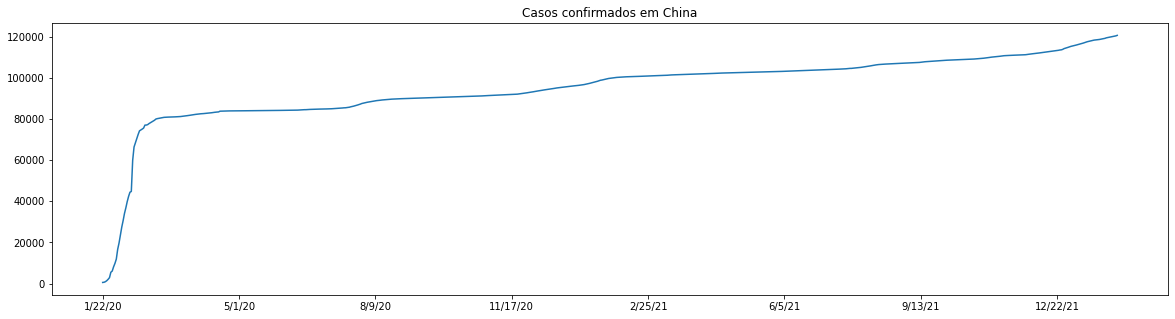

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,5))
confirmed_by_country.loc['China'][2:].plot()
plt.title('Casos confirmados em China')
plt.show()

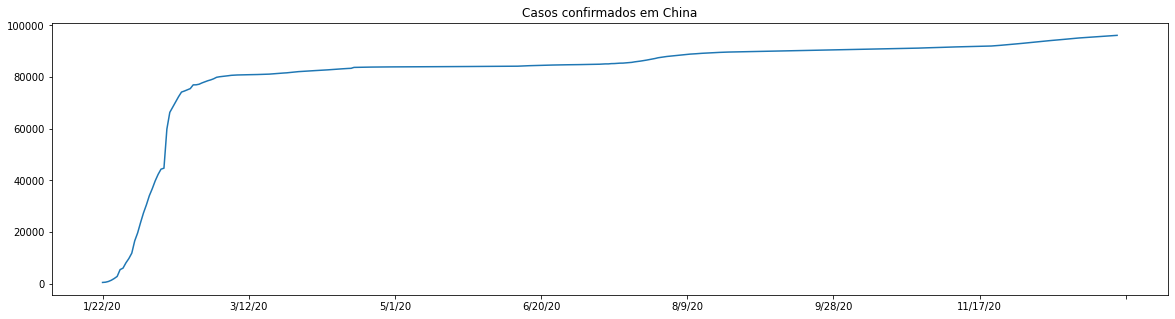

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,5))
confirmed_by_country.loc['China'][2:350].plot()
plt.title('Casos confirmados em China')
plt.show()

In [ ]:
new_cases_china = confirmed_by_country.loc["China"][2:60].diff()
new_cases_china

1/22/20        NaN
1/23/20       95.0
1/24/20      277.0
1/25/20      486.0
1/26/20      669.0
1/27/20      802.0
1/28/20     2632.0
1/29/20      578.0
1/30/20     2054.0
1/31/20     1661.0
2/1/20      2089.0
2/2/20      4739.0
2/3/20      3086.0
2/4/20      3991.0
2/5/20      3733.0
2/6/20      3147.0
2/7/20      3523.0
2/8/20      2704.0
2/9/20      3015.0
2/10/20     2525.0
2/11/20     2032.0
2/12/20      373.0
2/13/20    15136.0
2/14/20     6463.0
2/15/20     2055.0
2/16/20     2100.0
2/17/20     1921.0
2/18/20     1777.0
2/19/20      408.0
2/20/20      458.0
2/21/20      473.0
2/22/20     1451.0
2/23/20       21.0
2/24/20      219.0
2/25/20      513.0
2/26/20      412.0
2/27/20      434.0
2/28/20      328.0
2/29/20      428.0
3/1/20       576.0
3/2/20       204.0
3/3/20       125.0
3/4/20       125.0
3/5/20       151.0
3/6/20       153.0
3/7/20        80.0
3/8/20        53.0
3/9/20        37.0
3/10/20       27.0
3/11/20       34.0
3/12/20       11.0
3/13/20       13.0
3/14/20     

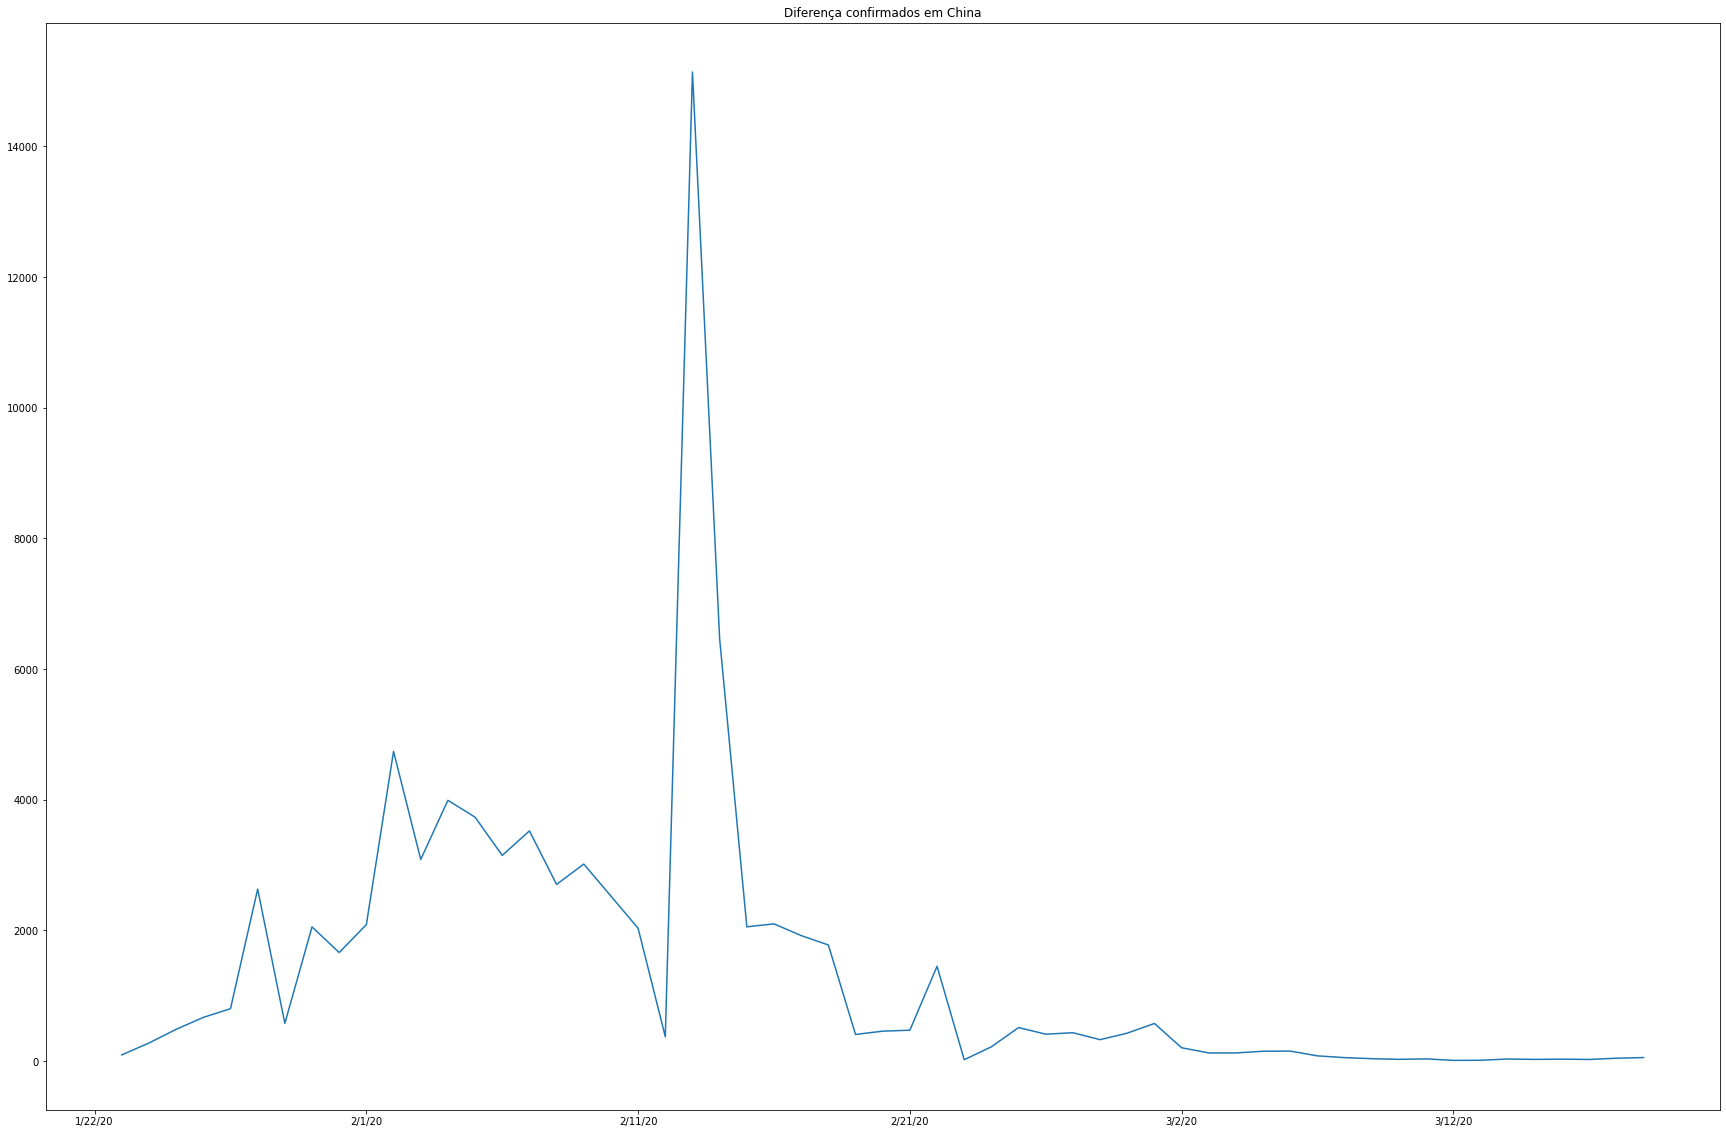

In [ ]:
plt.figure(figsize=(30,20))
new_cases_china.plot()
plt.title('Diferença confirmados em China')
plt.show()

In [ ]:
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,...,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340


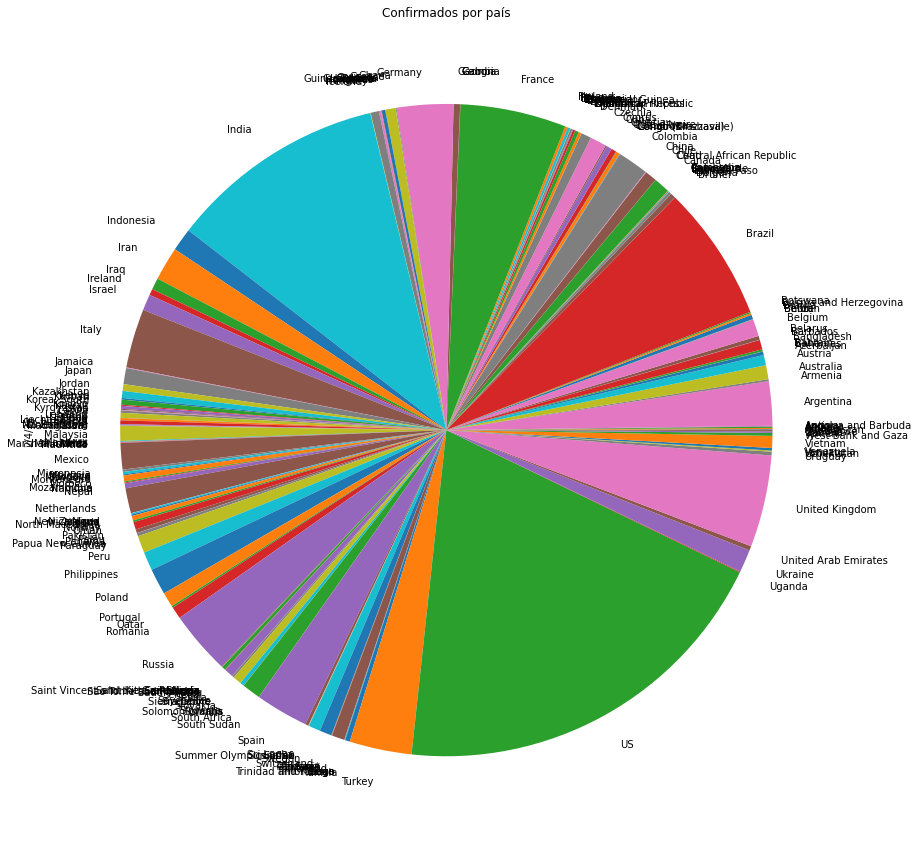

In [ ]:
plt.figure(figsize=(20,15))
plt.title('Confirmados por país')
confirmed_by_country[last_date].plot(kind='pie')
plt.show()

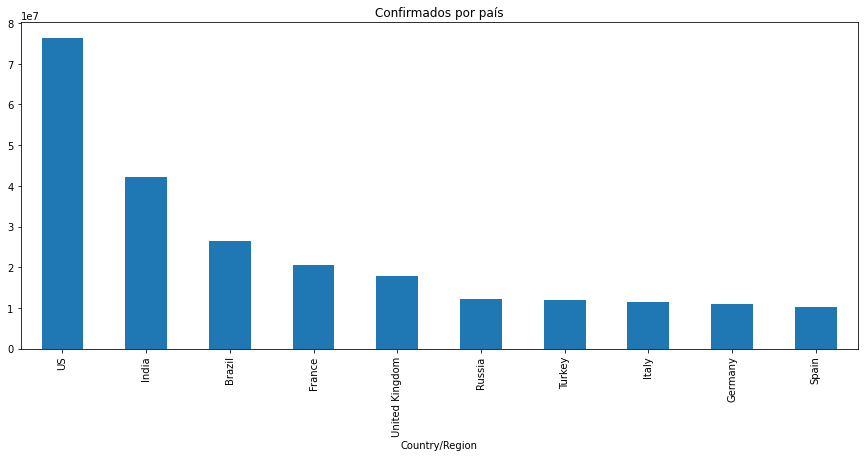

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Confirmados por país')
confirmed_by_country[last_date].sort_values(ascending=False)[0:10].plot(kind='bar')
plt.show()

In [ ]:
confirmed.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan    165358
Albania        263172
Algeria        256806
Andorra         36599
Angola          98340
Name: 2/4/22, dtype: int64

In [ ]:
def latest_by_country(data):
    return data.groupby('Country/Region').sum().iloc[:, -3]

In [ ]:
informations = [latest_by_country(confirmed),latest_by_country(deaths),latest_by_country(recovered)]
combined = pd.concat(informations,axis=1)
combined.columns = ['confirmed','deaths','recovered']
combined

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,164190,7418,0
Albania,261240,3362,0
Algeria,254885,6604,0
Andorra,36315,146,0
Angola,98267,1895,0
...,...,...,...
Vietnam,2295494,37777,0
West Bank and Gaza,546176,5116,0
Yemen,11113,2018,0


In [ ]:
sum_up = combined.sum()
letality_rate_1 = sum_up['deaths'] / sum_up['confirmed']
print(letality_rate_1 * 100)

1.4811058753246955


In [ ]:
letality_rate_1 = combined['deaths'] / combined['confirmed'] * 100
combined['letality_rate_1'] = letality_rate_1
combined.head()

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
Afghanistan,164190,7418,0,4.517937
Albania,261240,3362,0,1.286939
Algeria,254885,6604,0,2.590972
Andorra,36315,146,0,0.402038
Angola,98267,1895,0,1.928420


In [ ]:
letality_rate_2 = combined['deaths'] / (combined['recovered'] + combined['deaths'])
letality_rate_2
combined['letality_rate_2'] = letality_rate_2

In [ ]:
combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,164190,7418,0,4.517937,1.0
Albania,261240,3362,0,1.286939,1.0
Algeria,254885,6604,0,2.590972,1.0
Andorra,36315,146,0,0.402038,1.0
Angola,98267,1895,0,1.928420,1.0


In [ ]:
combined.sort_values('letality_rate_1', ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
MS Zaandam,9,2,0,22.222222,1.0
Yemen,11113,2018,0,18.158913,1.0
Vanuatu,7,1,0,14.285714,1.0
Peru,3286151,206220,0,6.275427,1.0
Mexico,4985689,306920,0,6.156020,1.0
Sudan,58623,3533,0,6.026645,1.0
Syria,51569,2995,0,5.807753,1.0
Egypt,430480,22735,0,5.281314,1.0
Somalia,26067,1335,0,5.121418,1.0


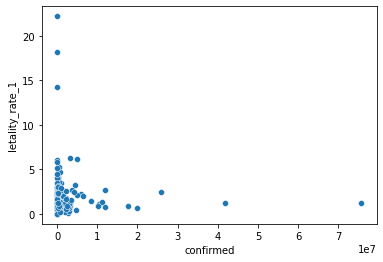

In [ ]:
import seaborn as sns

sns.scatterplot(data=combined, x='confirmed', y='letality_rate_1')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


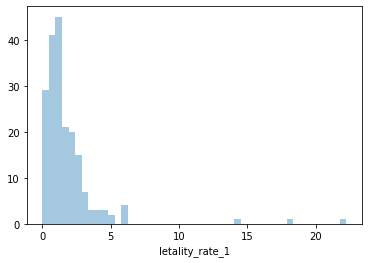

In [ ]:
sns.distplot(combined["letality_rate_1"], kde=False)

In [ ]:
combined.sort_values('letality_rate_1', ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
MS Zaandam,9,2,0,22.222222,1.0
Yemen,11113,2018,0,18.158913,1.0
Vanuatu,7,1,0,14.285714,1.0
Peru,3286151,206220,0,6.275427,1.0
Mexico,4985689,306920,0,6.156020,1.0
Sudan,58623,3533,0,6.026645,1.0
Syria,51569,2995,0,5.807753,1.0
Egypt,430480,22735,0,5.281314,1.0
Somalia,26067,1335,0,5.121418,1.0


In [ ]:
def latest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]


informations = [latest_by_country_at(confirmed, '2/20/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis=1)
combined_2_20_20.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_2_20_20.loc["China"]
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.980939568709458
11.050760418724076


In [ ]:
display(sum_up)

confirmed    75077
deaths        2238
recovered    18014
Name: China, dtype: int64

In [ ]:
informations = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(informations, axis=1)
combined_12.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_12.loc["China"]
letality_rate_3 = sum_up["deaths"] / sum_up["confirmed"]
print(letality_rate_3 * 100)
display(sum_up)

6.079208996577389


confirmed    36814
deaths        2238
recovered    18014
Name: China, dtype: int64

In [ ]:
letality_rate_1 = combined["deaths"] / combined["confirmed"] * 100
letality_rate_2 = combined["deaths"] / (combined["recovered"] + combined["deaths"]) * 100
combined["letality_rate_1"] = letality_rate_1
combined["letality_rate_2"] = letality_rate_2
combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,164190,7418,0,4.517937,100.0
Albania,261240,3362,0,1.286939,100.0
Algeria,254885,6604,0,2.590972,100.0
Andorra,36315,146,0,0.402038,100.0
Angola,98267,1895,0,1.928420,100.0


In [ ]:
combined.sort_values("letality_rate_1", ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
MS Zaandam,9,2,0,22.222222,100.0
Yemen,11113,2018,0,18.158913,100.0
Vanuatu,7,1,0,14.285714,100.0
Peru,3286151,206220,0,6.275427,100.0
Mexico,4985689,306920,0,6.156020,100.0
Sudan,58623,3533,0,6.026645,100.0
Syria,51569,2995,0,5.807753,100.0
Egypt,430480,22735,0,5.281314,100.0
Somalia,26067,1335,0,5.121418,100.0
